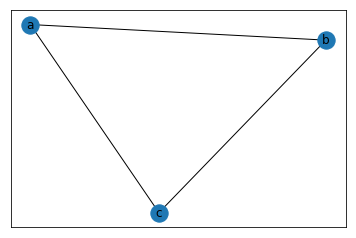

In [4]:
import networkx as net
import urllib

# 空のグラフを作る
g = net.Graph()

# グラフにエッジを挿入する。ノードは自動的に挿入される
g.add_edge('a','b')
g.add_edge('b','c')
g.add_edge('c', 'a')
net.draw_networkx(g)

In [5]:
g.nodes()

NodeView(('a', 'b', 'c'))

In [6]:
g.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c')])

{('a', 'b'): Text(0.4254574809084459, 0.2630860266063059, '{}'),
 ('a', 'c'): Text(0.015110441967546795, -0.5, '{}'),
 ('b', 'c'): Text(-0.44056792287599267, 0.23691397339369408, '{}')}

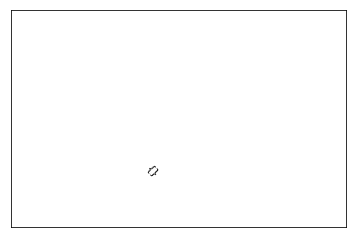

In [10]:
net.draw_networkx_edge_labels(g, pos=net.spring_layout(g))

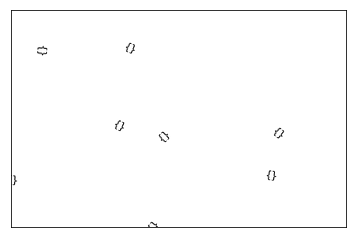

In [11]:
G = net.dodecahedral_graph()
edge_labels = net.draw_networkx_edge_labels(G, pos=net.spring_layout(G))

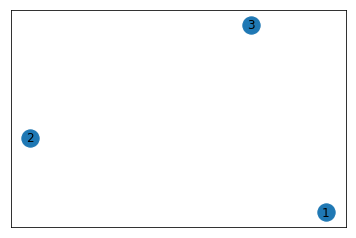

In [12]:
G = net.Graph()
G.add_nodes_from([(1, {'color': 'red'}), (2, {'color': 'blue'}), (3, {'color': 'red'})])
G.nodes(data = True)
net.draw_networkx(G)

In [35]:
import networkx as net
import urllib
# curl -X get https://www.livejournal.com/misc/fdata.bml?user=valerois
def read_lj_friends(g, name):
    # LiveJournal.comから友人リストをフェッチする
    response = urllib.request.urlopen("https://www.livejournal.com/misc/fdata.bml?user=" + name)

    # responseないの行を反復処理して、ネットワークのエッジとして追加してく
    for line in response.readlines():
        if str(line).startswith('#'): continue

        # フォーマットは"<name"（相手から）か">name"（相手に）
        # 空行を作らないようにする
        parts = line.split()

        if len(parts) == 0: continue

        # ネットワークにエッジを追加する
        if parts[0] == '<':
            g.add_edge(parts[1], name)
        else:
            g.add_edge(name, parts[1])

    
g = net.Graph()
read_lj_friends(g, 'valerois')
len(g) # count the number of nodes returned

310